In [42]:
import numpy as np
import pandas as pd
import librosa as lib
from tqdm import tqdm
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix,multilabel_confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


## Importar los rttm y convertirlos en un df

In [43]:
name_01= "alma-a1-nsb"
name_02= "amparol-a1-nsb"
name_03= "angelinap-a1-nsm"
name_04= "camilop-a1-nsb"
name_05= "catalinap-a1-nsm"
name_06= "cielor-a1-nsb"
name_07= "dantep-a1-nsm"
name_08= "demianm-a1-nsb"
name_09= "donatow-a1-nsm"
name_10= "francescal-a1-nsm"
name_11= "francescam-a1-nsm"
name_12= "franciscop-a1-nsb"
name_13= "helenab-a1-nsm"
name_14= "juanpablos-a1-nsm"
name_15= "lucianal-a1-nsb"
name_16= "maileno-a1-nsb"
name_17= "nicolasb-a1-nsm"
name_18= "nicolask-a1-nsm"
name_19= "oliviaa-a1-nsm"

In [44]:
df_resultados_01 = pd.read_csv(f"casos/{name_01}/df_results_{name_01}.csv")
df_resultados_02 = pd.read_csv(f"casos/{name_02}/df_results_{name_02}.csv")
df_resultados_03 = pd.read_csv(f"casos/{name_03}/df_results_{name_03}.csv")
df_resultados_04 = pd.read_csv(f"casos/{name_04}/df_results_{name_04}.csv")
df_resultados_05 = pd.read_csv(f"casos/{name_05}/df_results_{name_05}.csv")
df_resultados_06 = pd.read_csv(f"casos/{name_06}/df_results_{name_06}.csv")
df_resultados_07 = pd.read_csv(f"casos/{name_07}/df_results_{name_07}.csv")
df_resultados_08 = pd.read_csv(f"casos/{name_08}/df_results_{name_08}.csv")
df_resultados_09 = pd.read_csv(f"casos/{name_09}/df_results_{name_09}.csv")
df_resultados_10 = pd.read_csv(f"casos/{name_10}/df_results_{name_10}.csv")
df_resultados_11 = pd.read_csv(f"casos/{name_11}/df_results_{name_11}.csv")
df_resultados_12 = pd.read_csv(f"casos/{name_12}/df_results_{name_12}.csv")
df_resultados_13 = pd.read_csv(f"casos/{name_13}/df_results_{name_13}.csv")
df_resultados_14 = pd.read_csv(f"casos/{name_14}/df_results_{name_14}.csv")
df_resultados_15 = pd.read_csv(f"casos/{name_15}/df_results_{name_15}.csv")
df_resultados_16 = pd.read_csv(f"casos/{name_16}/df_results_{name_16}.csv")
df_resultados_17 = pd.read_csv(f"casos/{name_17}/df_results_{name_17}.csv")
df_resultados_18 = pd.read_csv(f"casos/{name_18}/df_results_{name_18}.csv")
df_resultados_19 = pd.read_csv(f"casos/{name_19}/df_results_{name_19}.csv")

In [45]:
df_resultados_concat = pd.concat([
    df_resultados_01,
    df_resultados_02,
    df_resultados_03,
    df_resultados_04,
    df_resultados_05,
    df_resultados_06,
    df_resultados_07,
    df_resultados_08,
    df_resultados_09,
    df_resultados_10,
    df_resultados_11,
    df_resultados_12,
    df_resultados_13,
    df_resultados_14,
    df_resultados_15,
    df_resultados_16,
    df_resultados_17,
    df_resultados_18,
    df_resultados_19
    
], ignore_index=True)
df_resultados_concat.to_csv("df_resultados_concat.csv")

In [46]:
# Definir las etiquetas
labels = ['KCHI', 'OCH', 'FEM', 'MAL']

# Extraer las etiquetas verdaderas y predichas
y_true = df_resultados_concat[['Elan_KCHI', 'Elan_OCH', 'Elan_FEM', 'Elan_MAL']].values
y_pred = df_resultados_concat[['Diar_KCHI', 'Diar_OCH', 'Diar_FEM', 'Diar_MAL']].values

# Calcular la matriz de confusión multilabel
conf_matrix = multilabel_confusion_matrix(y_true, y_pred)

# Mostrar la matriz de confusión para cada etiqueta
for i, label in enumerate(labels):
    print(f"Matriz de confusión para la etiqueta {label}:")
    print(conf_matrix[i])
    print()

# Generar el informe de clasificación como un diccionario
report_dict = classification_report(y_true, y_pred, target_names=labels, output_dict=True)

# Convertir el diccionario en un DataFrame de pandas
report_df = pd.DataFrame(report_dict).transpose()

# Opcionalmente, redondear los valores decimales
report_df = report_df.round(4)

# Reordenar las columnas si lo deseas
report_df = report_df[['precision', 'recall', 'f1-score', 'support']]

# Mostrar el DataFrame con buen formato
print("Informe de clasificación en formato de tabla:")
print(report_df)

# Exportar a Excel
report_df.to_excel('informe_clasificacion.xlsx', index=True)


Matriz de confusión para la etiqueta KCHI:
[[815944  72339]
 [375060  68657]]

Matriz de confusión para la etiqueta OCH:
[[1178001   76184]
 [  69749    8066]]

Matriz de confusión para la etiqueta FEM:
[[729142 102761]
 [355878 144219]]

Matriz de confusión para la etiqueta MAL:
[[1131163   32856]
 [ 131690   36291]]

Informe de clasificación en formato de tabla:
              precision  recall  f1-score    support
KCHI             0.4869  0.1547    0.2348   443717.0
OCH              0.0957  0.1037    0.0995    77815.0
FEM              0.5839  0.2884    0.3861   500097.0
MAL              0.5248  0.2160    0.3061   167981.0
micro avg        0.4751  0.2162    0.2972  1189610.0
macro avg        0.4229  0.1907    0.2566  1189610.0
weighted avg     0.5075  0.2162    0.2996  1189610.0
samples avg      0.1786  0.1905    0.1820  1189610.0


C:\Users\pablo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pablo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Matrices de confusión (Precisión y Recall)

In [47]:
# Conversión de etiquetas multilabel a etiquetas de clase única (mismo código que antes)
def multilabel_to_singlelabel(y_multilabel):
    single_labels = []
    for row in y_multilabel:
        indices = np.where(row == 1)[0]
        if len(indices) == 0:
            single_labels.append(-1)  # Sin etiqueta
        else:
            # Si hay múltiples etiquetas, puedes decidir cómo manejarlas.
            # Aquí, tomamos la primera etiqueta encontrada.
            single_labels.append(indices[0])
    return np.array(single_labels)

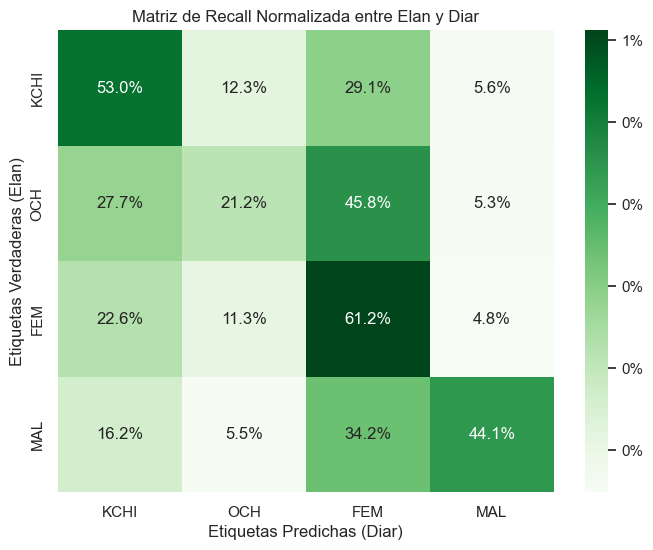

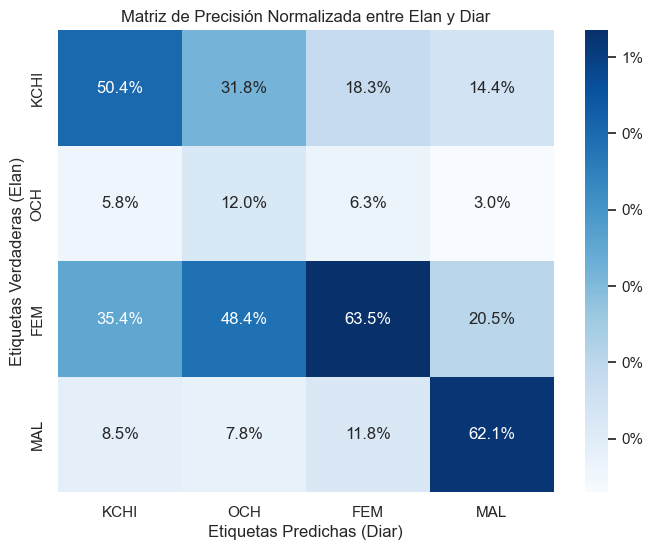

In [48]:
import numpy as np
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir etiquetas a single label (asegúrate de haber ejecutado multilabel_to_singlelabel)
y_true = multilabel_to_singlelabel(y_true)
y_pred = multilabel_to_singlelabel(y_pred)

# Filtrar las instancias sin etiqueta
valid_indices = y_true != -1
y_true = y_true[valid_indices]
y_pred = y_pred[valid_indices]

# Convertir a tipo int, en caso de que siga en un formato que confunda la función
y_true = np.array(y_true).astype(int)
y_pred = np.array(y_pred).astype(int)

# Asegurarnos de que las etiquetas estén en formato single-label
if y_true.ndim > 1 or y_pred.ndim > 1:
    y_true = y_true.ravel()
    y_pred = y_pred.ravel()

# Matriz de recall (normalización por filas) - color Greens
cm_recall = confusion_matrix(y_true, y_pred, labels=range(len(labels)), normalize='true')
cm_recall_df = pd.DataFrame(cm_recall, index=labels, columns=labels)
annot_recall = cm_recall_df.applymap(lambda x: '{0:.1f}%'.format(x*100))

plt.figure(figsize=(8,6))
sns.heatmap(cm_recall_df, annot=annot_recall, fmt='', cmap='Greens', cbar_kws={'format': '%.0f%%'})
plt.title('Matriz de Recall Normalizada entre Elan y Diar')
plt.ylabel('Etiquetas Verdaderas (Elan)')
plt.xlabel('Etiquetas Predichas (Diar)')
plt.savefig('matriz_recall_greens.png', dpi=300, bbox_inches='tight')
plt.show()

# Matriz de precisión (normalización por columnas) - color Blues
cm_precision = confusion_matrix(y_true, y_pred, labels=range(len(labels)), normalize='pred')
cm_precision_df = pd.DataFrame(cm_precision, index=labels, columns=labels)
annot_precision = cm_precision_df.applymap(lambda x: '{0:.1f}%'.format(x*100))

plt.figure(figsize=(8,6))
sns.heatmap(cm_precision_df, annot=annot_precision, fmt='', cmap='Blues', cbar_kws={'format': '%.0f%%'})
plt.title('Matriz de Precisión Normalizada entre Elan y Diar')
plt.ylabel('Etiquetas Verdaderas (Elan)')
plt.xlabel('Etiquetas Predichas (Diar)')
plt.savefig('matriz_precision_blues.png', dpi=300, bbox_inches='tight')
plt.show()


In [53]:
cm_precision_df

,KCHI,OCH,FEM,MAL
KCHI,0.504056,0.317766,0.183265,0.144195
OCH,0.057573,0.119908,0.063056,0.029829
FEM,0.353868,0.484196,0.635207,0.204703
MAL,0.084502,0.078130,0.118472,0.621274


In [54]:
cm_recall_df

,KCHI,OCH,FEM,MAL
KCHI,0.530289,0.122607,0.290837,0.056267
OCH,0.277151,0.211698,0.457890,0.053260
FEM,0.226032,0.113429,0.612041,0.048498
MAL,0.161787,0.054861,0.342156,0.441196


In [49]:
# from sklearn.metrics import multilabel_confusion_matrix

# confusion_matrices = multilabel_confusion_matrix(y_true, y_pred)

# for idx, label in enumerate(labels):
#     tn, fp, fn, tp = confusion_matrices[idx].ravel()
#     print(f"Matriz de Confusión para la clase '{label}':")
#     print(f"TP: {tp}, FP: {fp}, FN: {fn}, TN: {tn}\n")

# PARA INVESTIGAR

### Métricas para los resultados Globales

### Gráficos de Métricas para resultados globales

In [50]:
# Generar gráficos
sns.set(style="whitegrid")

# Gráfico de barras para Precisión
plt.figure(figsize=(8, 6))
sns.barplot(x='Tipo', y='Precisión', data=df_metrics, palette='Blues_d')
plt.title('Precisión por Tipo')
plt.ylim(0, 1)
plt.ylabel('Precisión')

# Guardar la figura como un archivo PNG
plt.savefig(f'casos/df_resultados_concat/precision_resultados_concat.png', dpi=300, bbox_inches='tight')

plt.show()

# Gráfico de barras para Recall
plt.figure(figsize=(8, 6))
sns.barplot(x='Tipo', y='Recall', data=df_metrics, palette='Greens_d')
plt.title('Recall por Tipo')
plt.ylim(0, 1)
plt.ylabel('Recall')

# Guardar la figura como un archivo PNG
plt.savefig(f'casos/df_resultados_concat/recall_resultados_concat.png', dpi=300, bbox_inches='tight')

plt.show()

# Gráfico de barras para F1-score
plt.figure(figsize=(8, 6))
sns.barplot(x='Tipo', y='F1-score', data=df_metrics, palette='Reds_d')
plt.title('F1-score por Tipo')
plt.ylim(0, 1)
plt.ylabel('F1-score')
# Guardar la figura como un archivo PNG
plt.savefig(f'casos/df_resultados_concat/f1score_resultados_concat.png', dpi=300, bbox_inches='tight')
plt.show()

# Gráfico combinado
df_metrics_melted = pd.melt(df_metrics, id_vars=['Tipo'], value_vars=['Precisión', 'Recall', 'F1-score'], var_name='Métrica', value_name='Valor')

plt.figure(figsize=(10, 6))
sns.barplot(x='Tipo', y='Valor', hue='Métrica', data=df_metrics_melted)
plt.title('Métricas por Tipo')
plt.ylim(0, 1)
plt.ylabel('Valor')
plt.legend(title='Métrica')

# Guardar la figura como un archivo PNG
plt.savefig(f'casos/df_resultados_concat/combinado_resultados_concat.png', dpi=300, bbox_inches='tight')

plt.show()


NameError: name 'df_metrics' is not defined

<Figure size 800x600 with 0 Axes>

In [52]:
# Paso 1: Calcular el total de etiquetas asignadas (suma de los soportes de todas las clases)
total_labels_assigned = report_df.loc[['KCHI', 'OCH', 'FEM', 'MAL'], 'support'].sum()

# Paso 2: Calcular el porcentaje del total de etiquetas para cada clase
report_df['Porcentaje del Total de Etiquetas'] = (report_df['support'] / total_labels_assigned) * 100

# Paso 3: Calcular la duración en minutos para cada clase
# Cada instancia corresponde a 0.1 segundos
report_df['Duración (minutos)'] = (report_df['support'] * 0.1) / 60  # 60 segundos en un minuto

# Paso 4: Crear la tabla resumen con los valores requeridos
tabla_resumen = report_df.loc[['KCHI', 'OCH', 'FEM', 'MAL'], ['support', 'Porcentaje del Total de Etiquetas', 'Duración (minutos)']]

# Paso 5: Añadir una fila con los totales
totales = pd.DataFrame({
    'support': [tabla_resumen['support'].sum()],
    'Porcentaje del Total de Etiquetas': [tabla_resumen['Porcentaje del Total de Etiquetas'].sum()],
    'Duración (minutos)': [tabla_resumen['Duración (minutos)'].sum()]
}, index=['Total'])

tabla_resumen = pd.concat([tabla_resumen, totales])

# Formatear los porcentajes y los minutos para que tengan dos decimales
tabla_resumen['Porcentaje del Total de Etiquetas'] = tabla_resumen['Porcentaje del Total de Etiquetas'].map('{:.2f}%'.format)
tabla_resumen['Duración (minutos)'] = tabla_resumen['Duración (minutos)'].map('{:.2f}'.format)

# Renombrar la columna 'support' a 'Número de Instancias (Soporte)'
tabla_resumen.rename(columns={'support': 'Número de Instancias (Soporte)'}, inplace=True)
tabla_resumen.to_excel('casos/df_resultados_concat/tabla_resumen.xlsx')
# Mostrar la tabla resumen
print(tabla_resumen)



       Número de Instancias (Soporte) Porcentaje del Total de Etiquetas  \
KCHI                         443717.0                            37.30%   
OCH                           77815.0                             6.54%   
FEM                          500097.0                            42.04%   
MAL                          167981.0                            14.12%   
Total                       1189610.0                           100.00%   

      Duración (minutos)  
KCHI              739.53  
OCH               129.69  
FEM               833.50  
MAL               279.97  
Total            1982.68  
